# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [15]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    loss = 0
    for i in range(len(X)):
        loss += (Y[i] - np.dot(w.T, X[i]))**2
    
    return loss / len(X)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    gradient = -2 * x * (y - np.dot(w.T, x))   
    
    return gradient  

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    losses = []
    w = np.copy(w_start)
    for i in range(N_epochs):
        order = np.random.permutation(len(X))
        losses.append(loss(X, Y, w))
        for j in range(len(X)):
            ind = order[j]
            w -= eta * gradient(X[ind], Y[ind], w)
    return w, losses   

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [26]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================
data = load_data('data/sgd_data.csv')
x = []
y = []
for i in range(len(data)):
    no_bias = data[i][:4]
    with_bias = np.insert(no_bias, 0, 1)
    x.append(with_bias)
    y.append(data[i][4])
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epochs = 1000
eta = np.exp(-15)
descent = SGD(x, y, w_start, eta, N_epochs)
descent[0]

array([ -0.22788743,  -5.97854985,   3.98837527, -11.85702112,
         8.91128265])

## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

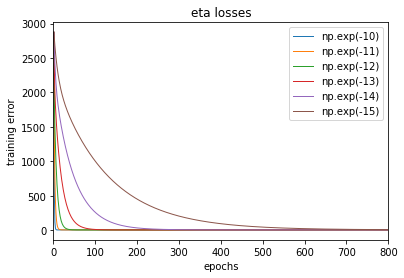

In [27]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================
epochs = np.linspace(1, 1000, 800)
eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epochs = 800
plt.figure()
plt.xlim(right = 800)
for i in range(6):
    graphs = SGD(x, y, w_start, eta_vals[i], N_epochs)
    plt.plot(epochs, graphs[1], linewidth = 1)
plt.legend(['np.exp(-10)', 'np.exp(-11)', 'np.exp(-12)', 'np.exp(-13)', 'np.exp(-14)', 'np.exp(-15)'], loc = 'best')
plt.xlabel('epochs')
plt.ylabel('training error')
plt.title('eta losses')
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [38]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
np.dot(np.linalg.pinv(x), y)

array([ -0.31644251,  -5.99157048,   4.01509955, -11.93325972,
         8.99061096])